In [17]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA

In [2]:
path = kagglehub.dataset_download("devansodariya/student-performance-data")

print("Path to dataset files:", path)
print("Path to dataset files:", path)
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file is None:
    print("No CSV file found in the directory.")
else:
    print(f"Found CSV file: {csv_file}")


Path to dataset files: C:\Users\keert\.cache\kagglehub\datasets\devansodariya\student-performance-data\versions\1
Path to dataset files: C:\Users\keert\.cache\kagglehub\datasets\devansodariya\student-performance-data\versions\1
Found CSV file: C:\Users\keert\.cache\kagglehub\datasets\devansodariya\student-performance-data\versions\1\student_data.csv


In [3]:
df = pd.read_csv(csv_file, delimiter=',')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

print(df.info())

Number of rows: 395
Number of columns: 33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery 

In [5]:
for column in df.select_dtypes(include='object').columns:
    print(f"\nUnique values and counts for column '{column}':")
    print(df[column].value_counts())


Unique values and counts for column 'school':
school
GP    349
MS     46
Name: count, dtype: int64

Unique values and counts for column 'sex':
sex
F    208
M    187
Name: count, dtype: int64

Unique values and counts for column 'address':
address
U    307
R     88
Name: count, dtype: int64

Unique values and counts for column 'famsize':
famsize
GT3    281
LE3    114
Name: count, dtype: int64

Unique values and counts for column 'Pstatus':
Pstatus
T    354
A     41
Name: count, dtype: int64

Unique values and counts for column 'Mjob':
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

Unique values and counts for column 'Fjob':
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

Unique values and counts for column 'reason':
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

Unique values and counts for column 'gu

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


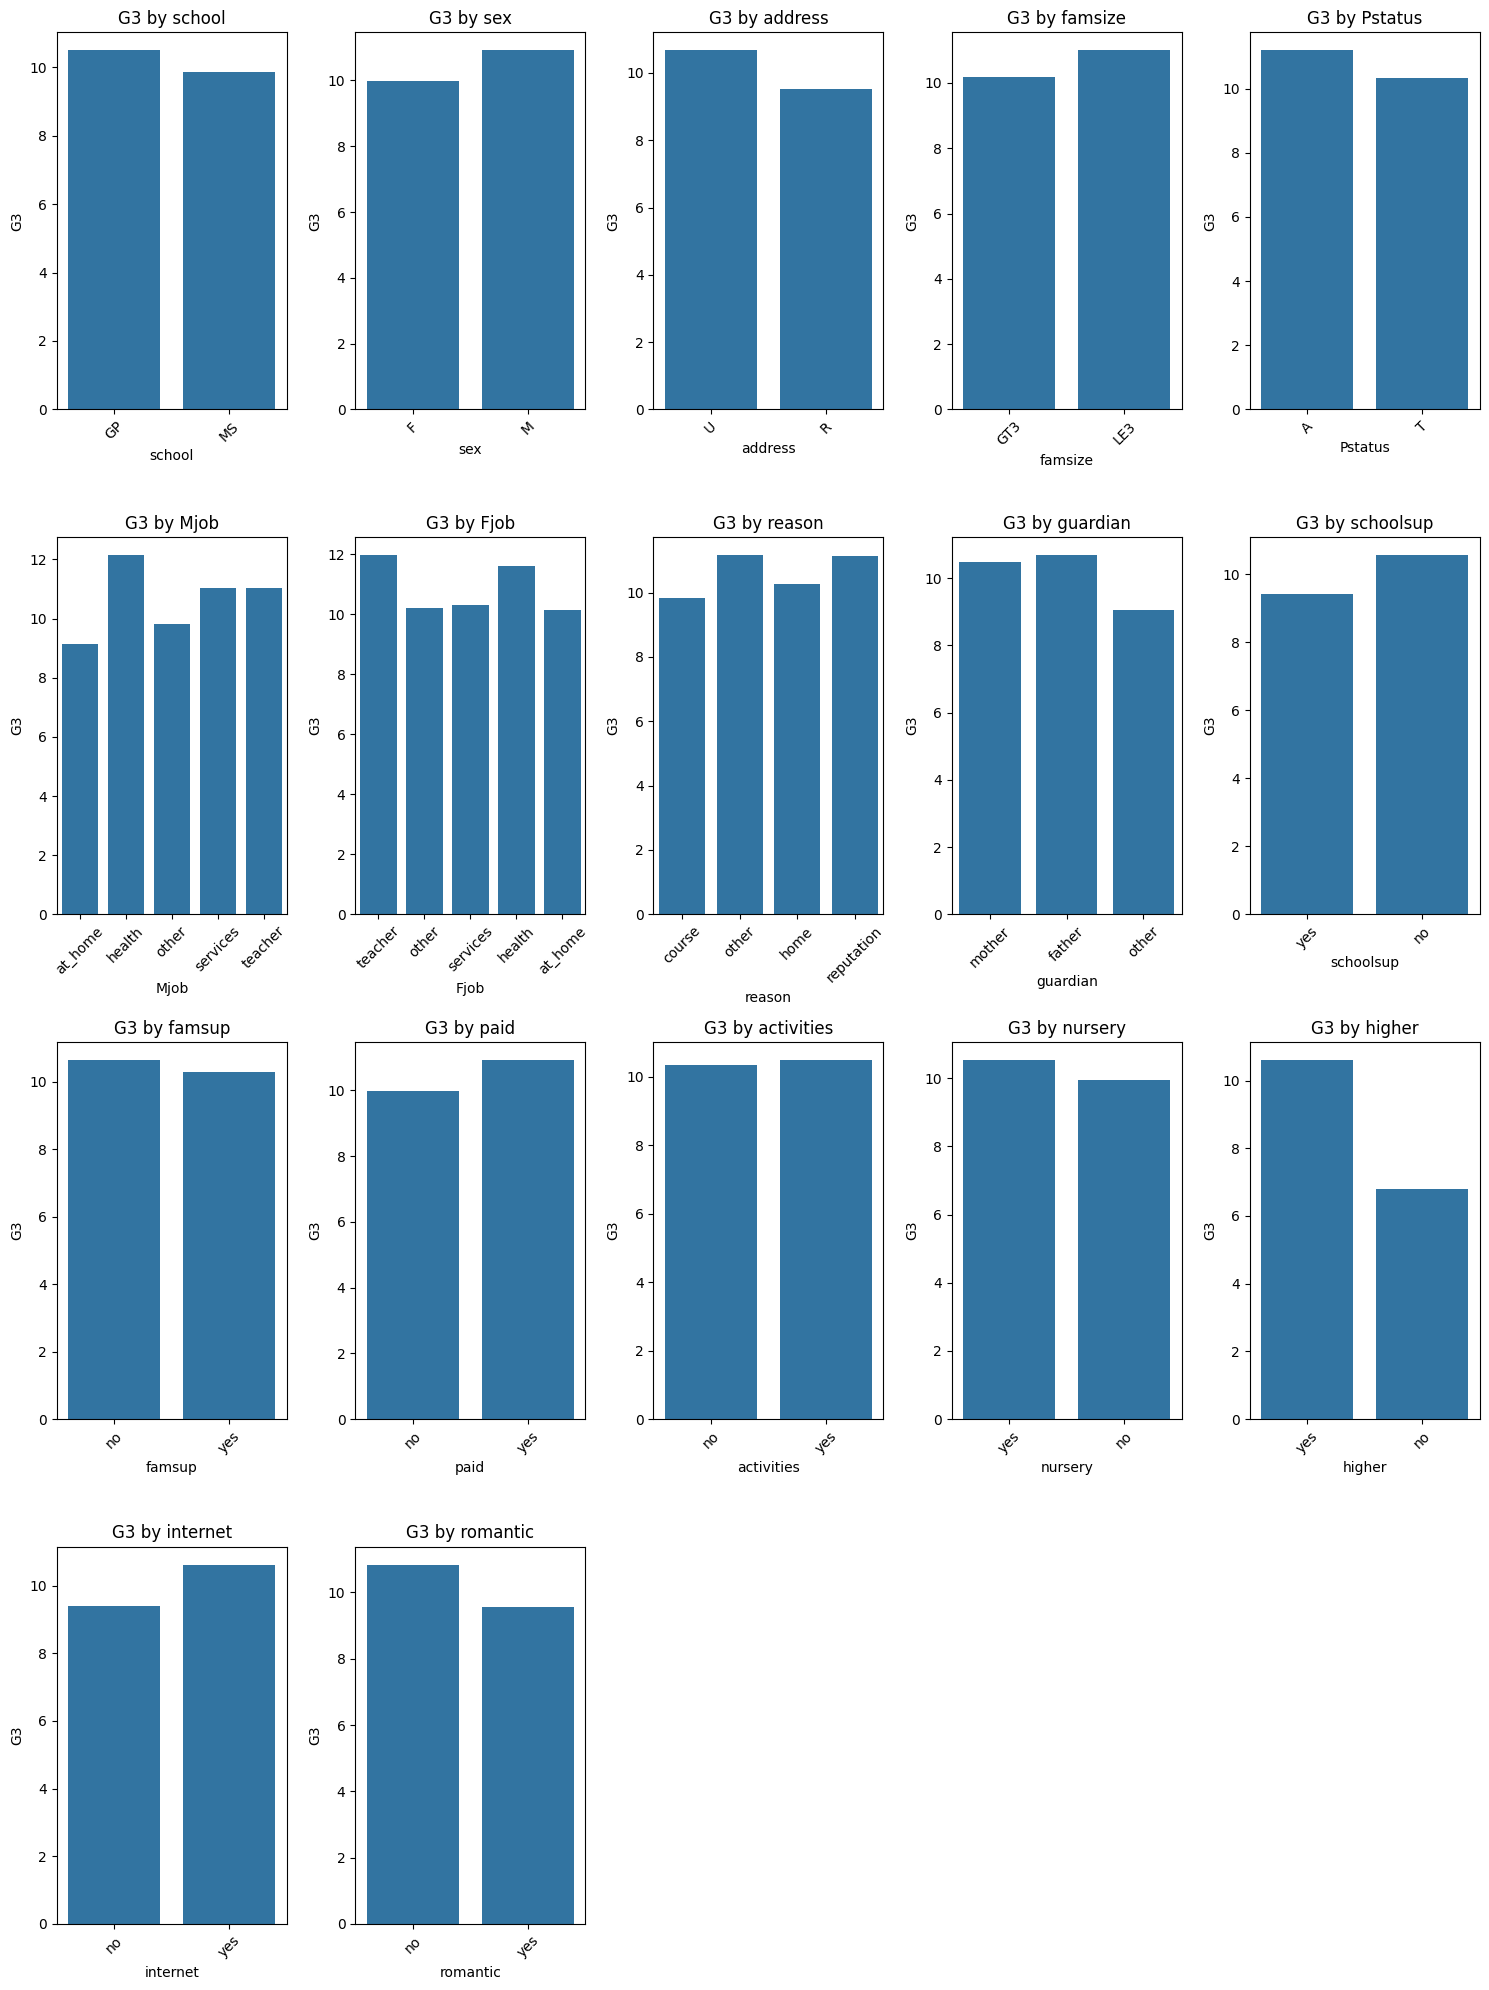

In [7]:
num_plots = len(df.select_dtypes(include='object').columns)
plots_per_row = 5
num_rows = (num_plots + plots_per_row - 1) // plots_per_row  # Calculate number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust height based on number of rows

# Loop through each column and create a bar plot
for i, column in enumerate(df.select_dtypes(include='object').columns):
    plt.subplot(num_rows, plots_per_row, i + 1)  # Create subplots
    sns.barplot(x=column, y='G3', data=df, errorbar=None)  # Use mean for aggregation
    plt.title(f'G3 by {column}')
    plt.xlabel(column)
    plt.ylabel('G3')

    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: >

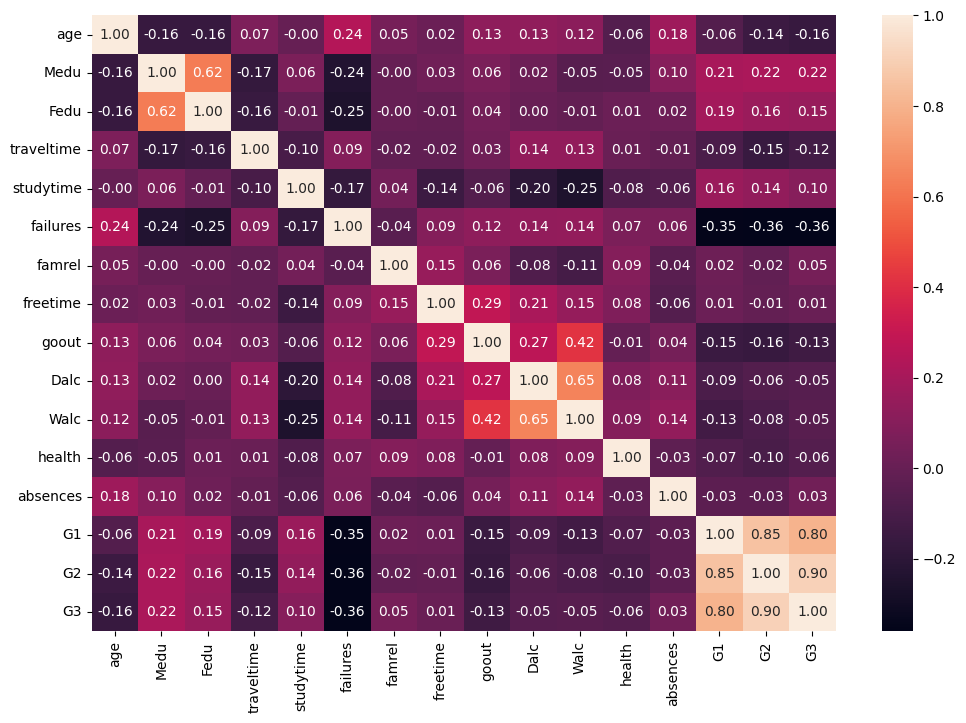

In [8]:
plt.figure(figsize=(12, 8)) 
numerical_df = df.select_dtypes(exclude=['object'])
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f")

<h1>Converting boolean to numeric
[schoolsup,famsup,paid,activities,nursery,internet,romantic]</h1>

In [9]:
boolean_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic']

df[boolean_cols] = df[boolean_cols].replace({'yes': 1, 'no': 0})

C:\Users\keert\AppData\Local\Temp\ipykernel_17808\1567851825.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[boolean_cols] = df[boolean_cols].replace({'yes': 1, 'no': 0})


<h1>Nominal[school,sex,famsize,Pstatus,Mjob,Fjob,reason,guardian] -> One-Hot Encoding </h1>

In [10]:
# Apply One-Hot Encoding for Nominal Variables
nominal_cols = ['school', 'address','sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian','higher']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
df = df.astype(int)

In [11]:
X_df=df.drop('G3',axis=1)
Y_df=df['G3']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.15, random_state=42)
# Apply Standardization to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

# Display the predictions and evaluation metrics
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred)})
print(results_df)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

     Actual  Predicted
78       10        6.0
371      12       11.0
248       5        3.0
55       10        8.0
390       9        9.0
223      13       12.0
42       18       19.0
234       6        7.0
316       0        7.0
116      14       13.0
9        15       14.0
209       7        6.0
323      15       14.0
393      10       12.0
258      14       15.0
155       8        8.0
124       8        6.0
272      11       11.0
324      15       14.0
334       0        8.0
15       14       14.0
391      16       17.0
167      16       14.0
0         6        6.0
140       0        9.0
113      19       21.0
77       11       10.0
33       12        9.0
101      17       17.0
76       10       12.0
307       8       10.0
375      10        7.0
291      15       15.0
356      13       13.0
90        8        5.0
384       5        4.0
137       0       -2.0
57       15       16.0
73       14       12.0
25        8        7.0
72        5        6.0
145      11       10.0
329      14

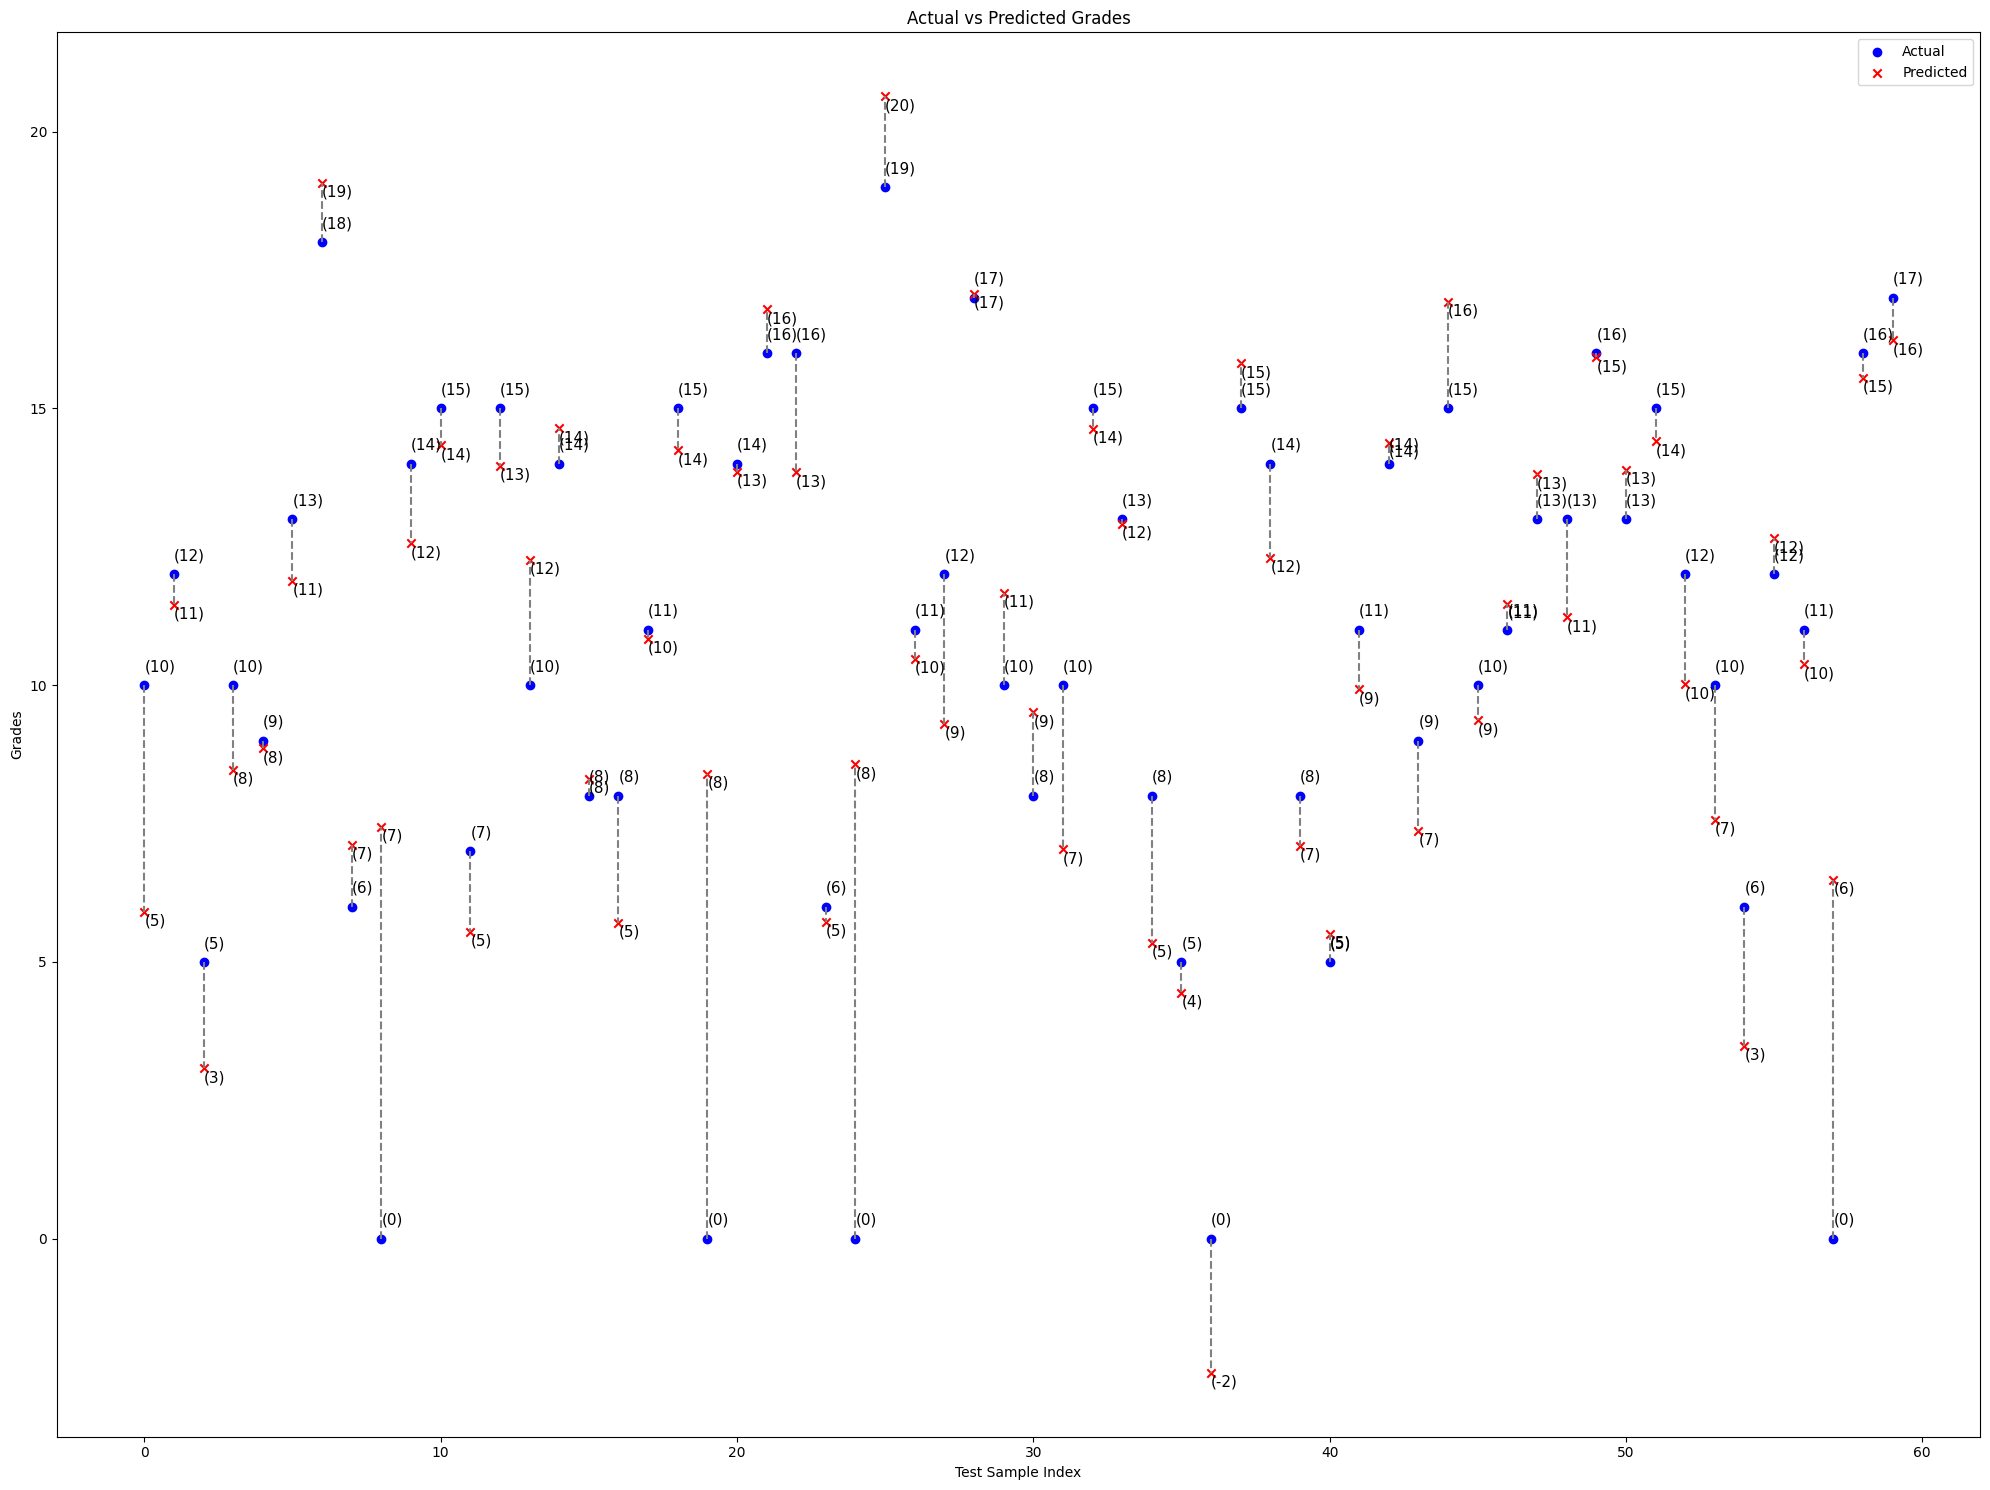

In [13]:
plt.figure(figsize=(20, 15))

for i, (actual, predicted) in enumerate(zip(y_test.values, y_pred)):
    plt.scatter(i, actual, color='b', marker='o', label='Actual' if i == 0 else '')
    plt.scatter(i, predicted, color='r', marker='x', label='Predicted' if i == 0 else '')
    plt.plot([i, i], [actual, predicted], linestyle='--', color='gray')  # Add dashed line

    # Annotate data points with values
    plt.annotate(f"({int(actual)})", xy=(i, actual), textcoords="offset points", xytext=(0, 10), fontsize=11)
    plt.annotate(f"({int(predicted)})", xy=(i, predicted), textcoords="offset points", xytext=(0, -10), fontsize=11)

plt.title('Actual vs Predicted Grades')
plt.xlabel('Test Sample Index')
plt.ylabel('Grades')
plt.legend()
plt.tight_layout()
plt.show()

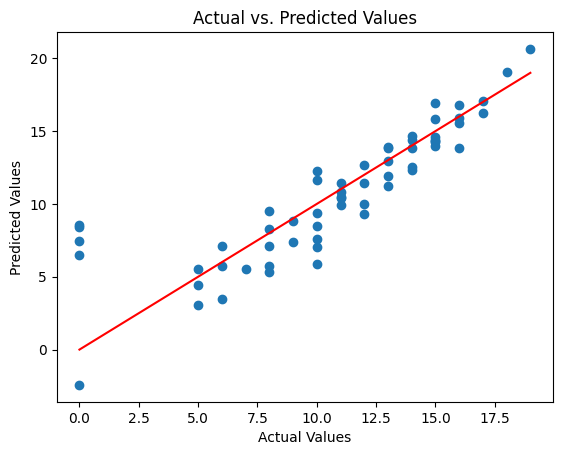

In [14]:
# Assuming you have your actual values in y_test and predicted values in y_pred

# Create a scatter plot
plt.scatter(y_test, y_pred)

# Add a 45-degree line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Show the plot
plt.show()

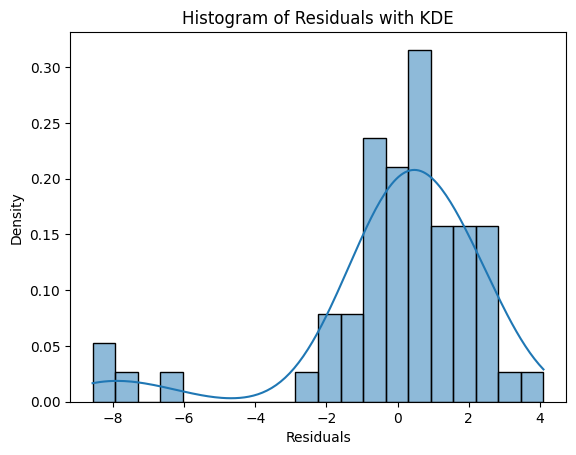

In [15]:
residuals = y_test - y_pred

# Create the plot
sns.histplot(residuals, kde=True, stat='density', bins=20)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals with KDE")
plt.show()

(316, 41)
(316, 33)
[0.08929163 0.06758455 0.05227765 0.04883027 0.04418377 0.04164063
 0.04004466 0.03783847 0.0364228  0.03338531 0.03313021 0.03197191
 0.0298132  0.02727442 0.02657569 0.02513856 0.02423532 0.0236019
 0.02281045 0.02002317 0.01977124 0.01892713 0.01873488 0.01712529
 0.01673717 0.01610158 0.01509645 0.01437353 0.01389806 0.01272609
 0.01180284 0.01138964 0.00997073]
[0.08929163 0.15687618 0.20915383 0.25798409 0.30216786 0.3438085
 0.38385315 0.42169162 0.45811442 0.49149974 0.52462994 0.55660186
 0.58641506 0.61368948 0.64026517 0.66540372 0.68963904 0.71324094
 0.73605139 0.75607456 0.7758458  0.79477292 0.81350781 0.8306331
 0.84737027 0.86347185 0.8785683  0.89294183 0.9068399  0.91956598
 0.93136883 0.94275847 0.9527292 ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[-0.22010243  0.33510968  0.30609767 ...  0.06009444 -0.14436098
   0.23220222]
 [-0.03061092  0.22715928  0.2049790

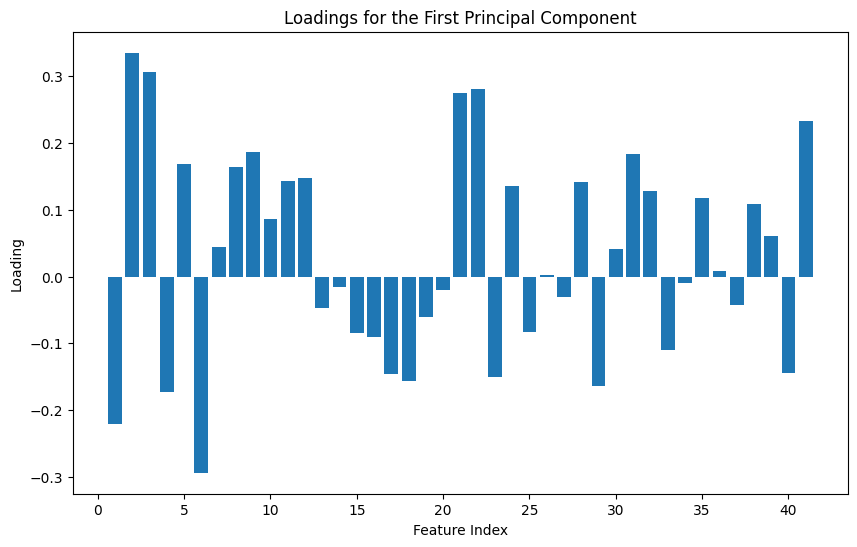

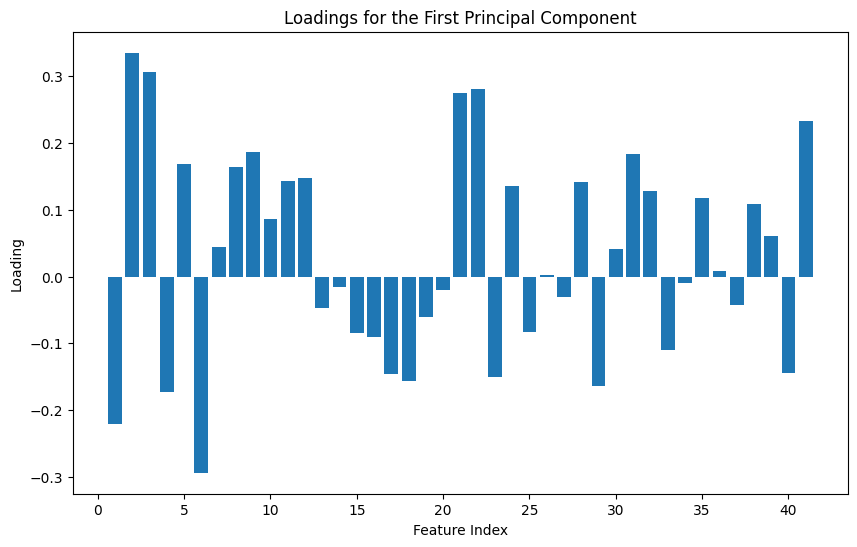

mean_absolute_error: 1.457, r2_score: 0.765
mean_absolute_error: 1.917, r2_score: 0.777
mean_absolute_error: 1.416, r2_score: 0.732
mean_absolute_error: 1.297, r2_score: 0.826
mean_absolute_error: 1.602, r2_score: 0.790
test_mean_absolute_error: 1.795, test_r2_score: 0.709


In [33]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2,random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

'''pca = PCA()
pca.fit(X_train_scaled)

threshold = 0.95
n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= threshold) + 1'''
# Apply PCA with the chosen number of components
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_train.shape)
print(X_train_pca.shape)
loadings = pca.components_
# Choose the number of components to retain (e.g., to explain 95% of the variance)

feature_variances = np.var(X_train_scaled, axis=0)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(feature_variances)

# Print the loadings
print(loadings)

# Visualize the loadings (e.g., for the first two principal components)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(loadings[0]) + 1), loadings[0])
plt.xlabel('Feature Index')
plt.ylabel('Loading')
plt.title('Loadings for the First Principal Component')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(loadings[30]) + 1), loadings[0])
plt.xlabel('Feature Index')
plt.ylabel('Loading')
plt.title('Loadings for the First Principal Component')
plt.show()

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_train_pca):
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]  # Use iloc for correct indexing

    # Train the logistic regression model
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation fold
    y_val_pred = model.predict(X_val_fold)
    mae = mean_absolute_error(y_val_fold , y_val_pred)
    r2 = r2_score(y_val_fold , y_val_pred)
    print(f"mean_absolute_error: {mae:.3f}, r2_score: {r2:.3f}")

# Train the final model on the entire training set
model.fit(X_train_pca, y_train)

# Evaluate the final model on the test set
y_test_pred = model.predict(X_test_pca)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"test_mean_absolute_error: {mae:.3f}, test_r2_score: {r2:.3f}")